# Thématique 5 - Analyse multivariée et analyse en composantes principales

### Importation des librairies

In [82]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data pre-processing

In [83]:
# File pre-processing
filepath = "../data"
filename = "DecathlonData.txt"
file = os.path.join(filepath, filename)

# Reading data
df_original = pd.read_csv(file, sep="\t")
df = df_original.copy()

# Data display
df.describe()

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


Ce jeu de données présente les données d'un décathlon pour différents concurrents. Il y a 41 concurrents et pour chaque concurrent, ce jeu de données met en évidence le résultat de chaque épreuve.

Le nombre moyen de points dans la compétition pour chaque client est de 8005 points. Le plus mauvais concurrent a obtenu 7313 points et le meilleur, 8893 points.

In [84]:
df.head()

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [85]:
df.tail()

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points,Competition
Lorenzo,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.5,58.36,263.08,24,7592,OlympicG
Karlivans,11.33,7.26,13.30,1.97,50.54,14.98,43.34,4.5,52.92,278.67,25,7583,OlympicG
Korkizoglou,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.7,53.05,317.00,26,7573,OlympicG
Uldal,11.23,6.99,13.53,1.85,50.95,15.09,43.01,4.5,60.00,281.70,27,7495,OlympicG
Casarsa,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.4,58.62,296.12,28,7404,OlympicG


In [86]:
df.shape

(41, 13)

Il y a 41 concurrents et 13 variables (dont 10 activités).

In [87]:
df.dtypes

centm            float64
Longjump         float64
Shotput          float64
Highjump         float64
quatrecentm      float64
centdixhurdle    float64
Discus           float64
Polevault        float64
Javeline         float64
mille500m        float64
Rank               int64
Points             int64
Competition       object
dtype: object

Dans cette étude, à l'exception du continent sur lequel se situe le pays, nous ne disposons que de variables quantitatives.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, SEBRLE to Casarsa
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   centm          41 non-null     float64
 1   Longjump       41 non-null     float64
 2   Shotput        41 non-null     float64
 3   Highjump       41 non-null     float64
 4   quatrecentm    41 non-null     float64
 5   centdixhurdle  41 non-null     float64
 6   Discus         41 non-null     float64
 7   Polevault      41 non-null     float64
 8   Javeline       41 non-null     float64
 9   mille500m      41 non-null     float64
 10  Rank           41 non-null     int64  
 11  Points         41 non-null     int64  
 12  Competition    41 non-null     object 
dtypes: float64(10), int64(2), object(1)
memory usage: 4.5+ KB


In [89]:
df.columns

Index(['centm', 'Longjump', 'Shotput', 'Highjump', 'quatrecentm',
       'centdixhurdle', 'Discus', 'Polevault', 'Javeline', 'mille500m', 'Rank',
       'Points', 'Competition'],
      dtype='object')

In [90]:
df.isnull().sum()

centm            0
Longjump         0
Shotput          0
Highjump         0
quatrecentm      0
centdixhurdle    0
Discus           0
Polevault        0
Javeline         0
mille500m        0
Rank             0
Points           0
Competition      0
dtype: int64

Il n'y a pas de données manquantes dans ce dataset.

In [91]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

CENTM :[11.04 10.76 11.02 11.34 11.11 11.13 10.83 11.64 11.37 11.33 11.36 10.85
 10.44 10.5  10.89 10.62 10.91 10.97 10.8  10.69 10.98 10.95 10.9  11.14
 10.55 10.68 11.06 10.87 10.92 11.08 11.1  10.86 11.23] 
LONGJUMP :[7.58 7.4  7.3  7.23 7.09 7.6  7.31 6.81 7.56 6.97 7.27 6.8  7.84 7.96
 7.81 7.47 7.74 7.14 7.19 7.53 7.48 7.49 6.99 7.34 7.5  7.07 7.38 6.61
 6.94 7.26 6.91 7.03 6.68] 
SHOTPUT :[14.83 14.26 14.77 14.25 15.19 14.31 13.48 13.76 14.57 14.41 14.09 12.68
 13.46 16.36 15.23 15.93 15.73 14.48 15.31 14.65 14.8  14.01 15.1  14.91
 15.24 14.44 14.97 13.88 13.55 13.07 15.69 15.15 13.62 13.22 13.3  14.81
 13.53 14.92] 
HIGHJUMP :[2.07 1.86 2.04 1.92 2.1  1.98 2.01 2.13 1.95 2.12 2.06 2.09 2.15 1.97
 2.03 1.88 1.94 1.91 1.85] 
QUATRECENTM :[49.81 49.37 48.37 48.93 50.42 48.68 48.62 49.91 50.14 51.1  49.48 49.2
 51.16 48.36 49.19 46.81 48.97 47.97 49.4  48.73 48.81 49.13 49.76 50.79
 50.3  49.41 49.27 49.72 49.12 49.11 49.65 48.51 51.04 49.56 48.61 51.67
 49.34 50.54 50.95 53.2 ] 


In [92]:
print(df)

             centm  Longjump  Shotput  Highjump  quatrecentm  centdixhurdle  \
SEBRLE       11.04      7.58    14.83      2.07        49.81          14.69   
CLAY         10.76      7.40    14.26      1.86        49.37          14.05   
KARPOV       11.02      7.30    14.77      2.04        48.37          14.09   
BERNARD      11.02      7.23    14.25      1.92        48.93          14.99   
YURKOV       11.34      7.09    15.19      2.10        50.42          15.31   
WARNERS      11.11      7.60    14.31      1.98        48.68          14.23   
ZSIVOCZKY    11.13      7.30    13.48      2.01        48.62          14.17   
McMULLEN     10.83      7.31    13.76      2.13        49.91          14.38   
MARTINEAU    11.64      6.81    14.57      1.95        50.14          14.93   
HERNU        11.37      7.56    14.41      1.86        51.10          15.06   
BARRAS       11.33      6.97    14.09      1.95        49.48          14.48   
NOOL         11.33      7.27    12.68      1.98     

## Analyse des données

Avant de commencer à analyser les données à l'aide de graphiques, il est nécessaire de nettoyer l'ensemble de données :
- Remplacer , par . afin que les données soient considérées comme des flottants et non comme des objets.

### Centrage et réduction des données

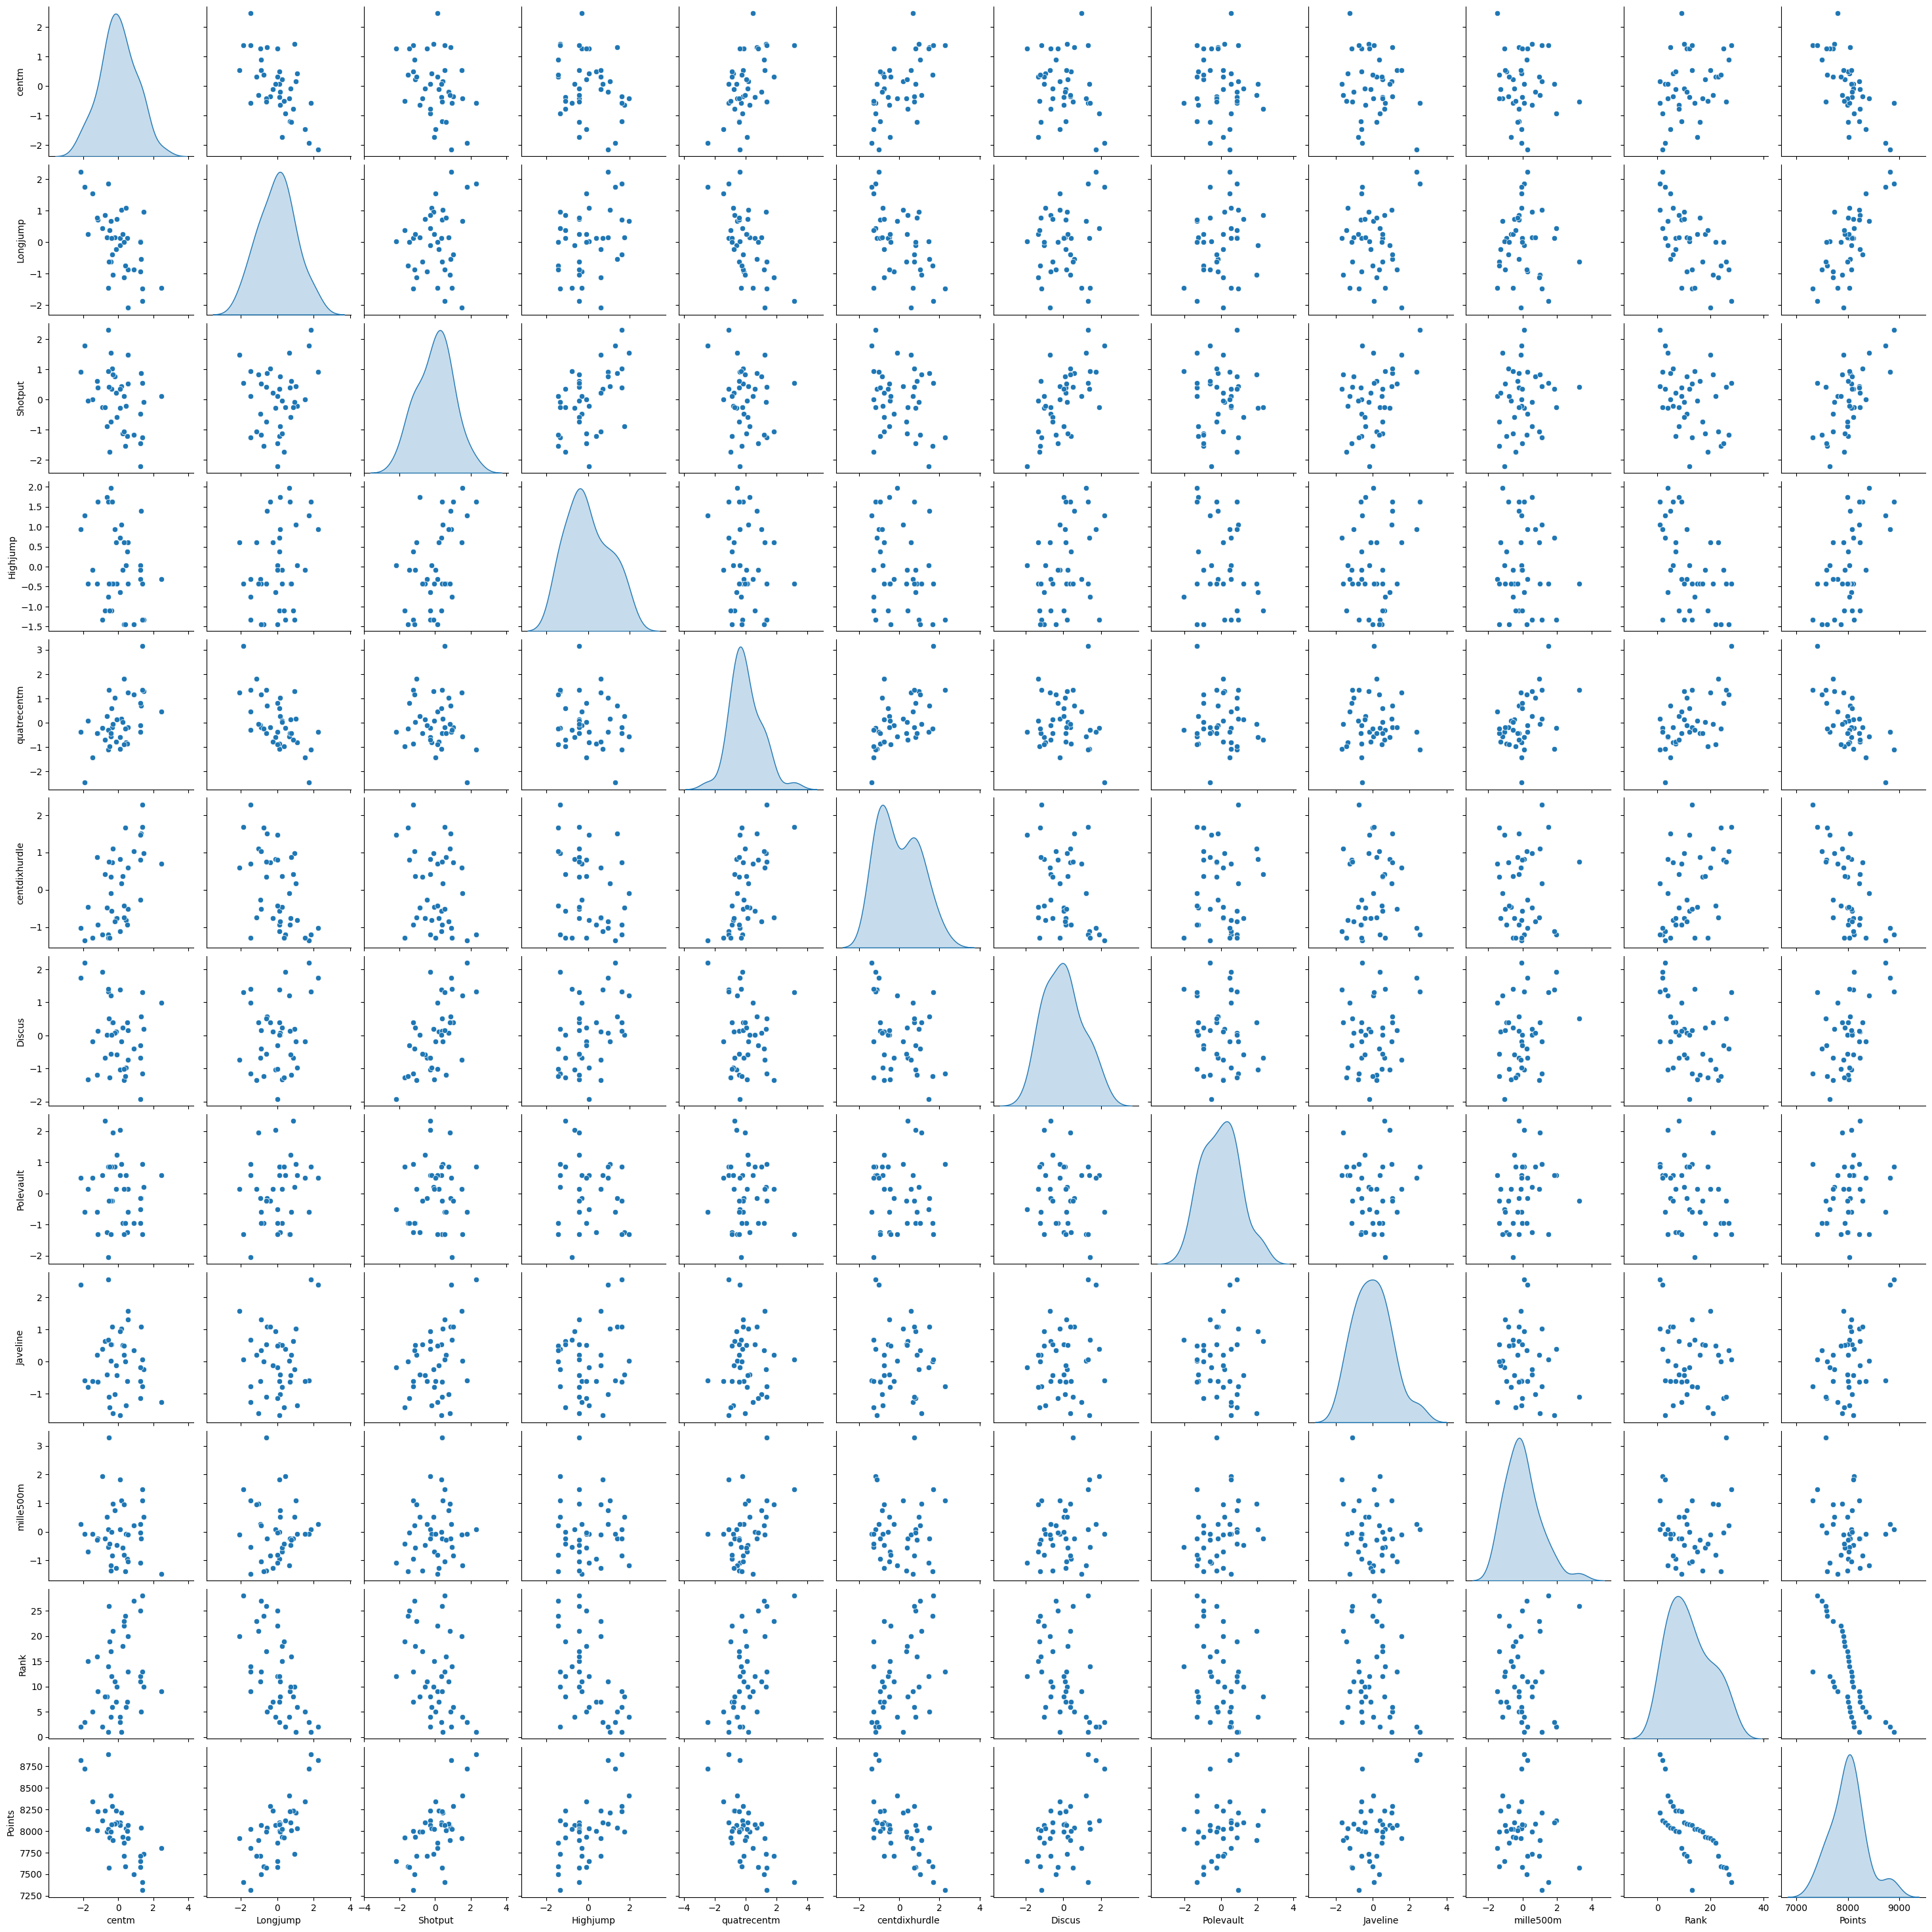

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

# Centering and reducting numeric data
variables_to_scale = df.select_dtypes(include=['float']).columns
df_scaled[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])

# Create a pairplot with seaborn on scaled data
sns.pairplot(df_scaled, diag_kind="kde")

## Traitement des données

### ACP

In [94]:
from sklearn.decomposition import PCA

# Réaliser l'ACP
pca = PCA()
components = pca.fit_transform(df_scaled.select_dtypes(include=['float']))

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Eigen value
vp = pca.explained_variance_

data_vp = []
variance_sum = 0

for i in range(len(vp)):
    variance_sum += explained_variance[i]
    data_vp.append([f"Comp {i+1}", vp[i], explained_variance[i]*100, variance_sum*100])

# Créer un DataFrame pandas
df_vp = pd.DataFrame(data_vp, columns=["Comp", "Eigenvalue", "Percentage of Variance", "Cumulative Variance"])

# Afficher le tableau
print(df_vp)

      Comp  Eigenvalue  Percentage of Variance  Cumulative Variance
0   Comp 1    3.353703               32.719055            32.719055
1   Comp 2    1.780559               17.371310            50.090366
2   Comp 3    1.440040               14.049167            64.139532
3   Comp 4    1.083272               10.568504            74.708036
4   Comp 5    0.701893                6.847735            81.555771
5   Comp 6    0.614250                5.992687            87.548458
6   Comp 7    0.462516                4.512353            92.060811
7   Comp 8    0.406799                3.968766            96.029577
8   Comp 9    0.220185                2.148149            98.177725
9  Comp 10    0.186783                1.822275           100.000000


32,7% de la 1ère composante et 17,4% de la 2ème composante expliquent 50% de l'inertie totale. Si l'on regarde la valeur propre, il faut 4 composantes pour obtenir 70% de l'inertie totale.

### Graphiques des vecteurs propres

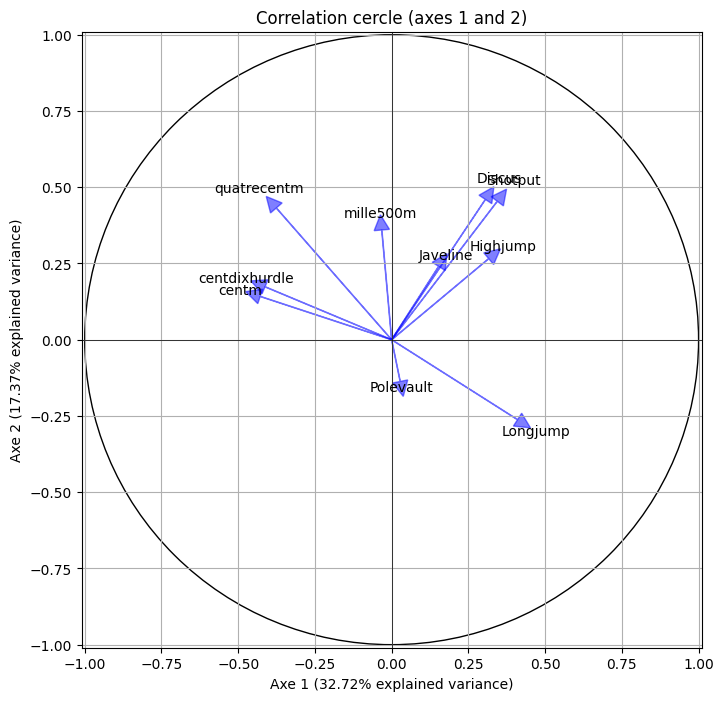

In [95]:
# Eigen vectors
components = pca.components_

# Plot
plt.figure(figsize=(8, 8))

# Pie chart
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)

# Abscissa and ordinate limits
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)

# Drawing eigen vectors
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='b', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x * 1.15, y * 1.15, df.columns[i], ha='center', va='center')

# Abscissa and ordinate labels
plt.xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}% explained variance)')
plt.ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}% explained variance)')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Correlation cercle (axes 1 and 2)")

# Plot display
plt.show()

**Rappel** :
- Les flèches proches du cercle indiquent que les variables sont bien représentées par les deux premières composantes principales.
- Les flèches perpendiculaires indiquent que les variables ne sont pas corrélées entre elles.
- Les flèches qui pointent dans la même direction indiquent une corrélation positive entre ces variables.
- Lorsque deux flèches pointent dans une direction similaire (proches l'une de l'autre), cela indique que les deux variables sont positivement corrélées.
- Si les flèches pointent dans des directions opposées (à environ 180 degrés l'une de l'autre), cela signifie que les deux variables sont fortement corrélées négativement. En d'autres termes, lorsque l'une des variables augmente, l'autre a tendance à diminuer.

**Explications** :
- Les flèches vers la gauche indiquent de petites valeurs : Ce qui est favorable dans ce contexte car il s'agit d'épreuves où il faut minimiser le score (*ex : courir le plus vite possible un 100m pour faire le temps le plus bas*).
- Ici, le 100m et le saut en longueur sont aux extrémités opposées du spectre, ce qui signifie qu'un athlète qui obtient un temps faible au 100m peut obtenir un score élevé au saut en longueur.
- Il y a 2 groupes. Le 1er groupe, composé des variables 'X100m', 'X400m', 'X110m.hurdle' et 'long.jump', représente les performances de vitesse. Le 2ème groupe, composé des variables 'Disque', 'Lancer du poids' et 'Saut en hauteur', représente les performances de force. Ces deux groupes ne sont pas corrélés (cos~0), ce qui signifie que la force et la vitesse ne sont pas liées. 

In [96]:
# Computing absolute contribution
contributions_abs = components**2

# Keep the 2-first contributions
contributions_pc1_pc2 = contributions_abs[:2, :]

# Computing relative contribution
contributions_pc1_relative = contributions_pc1_pc2[0] / contributions_pc1_pc2[0].sum() * 100
contributions_pc2_relative = contributions_pc1_pc2[1] / contributions_pc1_pc2[1].sum() * 100

# Creating a dataframe
df_contributions = pd.DataFrame({
    "Variable": variables_to_scale,
    "PC1 Relative Contribution (%)": contributions_pc1_relative,
    "PC2 Relative Contribution (%)": contributions_pc2_relative
})

print(df_contributions)

        Variable  PC1 Relative Contribution (%)  PC2 Relative Contribution (%)
0          centm                      18.343770                       2.016090
1       Longjump                      16.822467                       6.868559
2        Shotput                      11.843540                      20.606785
3       Highjump                       9.997887                       7.063694
4    quatrecentm                      14.116229                      18.666374
5  centdixhurdle                      17.020115                       3.013382
6         Discus                       9.328486                      21.162245
7      Polevault                       0.077455                       1.872547
8       Javeline                       2.346963                       5.784369
9      mille500m                       0.103088                      12.945954


Les variables Javelot, Saut à la perche, Mille 500m ou Saut en hauteur ont très peu contribué aux deux premières composantes, mais ont contribué aux composantes suivantes. 

Le premier axe semble représenter les épreuves de vitesse, tandis que le second s'identifie (moins clairement) aux épreuves de force. Nous pouvons en déduire la carte suivante :

![Schéma](../doc/schema.png)

In [97]:
# Creating a dataframe with cos²
cos2_df = pd.DataFrame(contributions_abs.T, index=variables_to_scale, columns=[f'Axe {i+1}' for i in range(components.shape[0])])

# cos² display
print("Cos² pour chaque variable sur les composantes principales :")
print(cos2_df*100)

Cos² pour chaque variable sur les composantes principales :
                   Axe 1      Axe 2      Axe 3      Axe 4      Axe 5  \
centm          18.343770   2.016090   2.420499   0.135329  13.336184   
Longjump       16.822467   6.868559   2.363191   0.980301   0.196456   
Shotput        11.843540  20.606785   0.038903   3.437115   1.804174   
Highjump        9.997887   7.063694   4.793625   1.739678  45.053306   
quatrecentm    14.116229  18.666374   1.230271   0.081242   1.122971   
centdixhurdle  17.020115   3.013382   0.610832   8.003279   3.943110   
Discus          9.328486  21.162245   0.131317   6.380208   1.604724   
Polevault       0.077455   1.872547  34.060900  28.782667  15.899147   
Javeline        2.346963   5.784369  10.807142  48.004802  13.596270   
mille500m       0.103088  12.945954  43.543320   2.455379   3.443657   

                   Axe 6      Axe 7      Axe 8      Axe 9     Axe 10  
centm           8.766182  14.575298  21.307651   1.097418  18.001580  
Longj

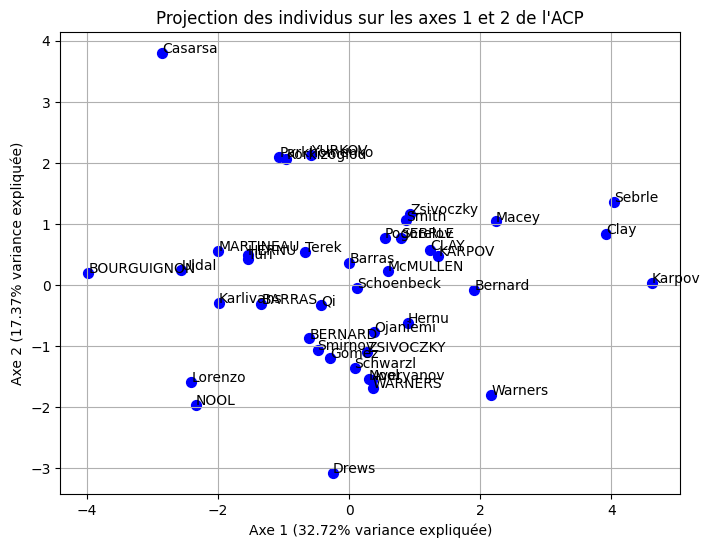

In [98]:
components = pca.fit_transform(df_scaled.select_dtypes(include=['float']))

# Points display on 2-first components
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c='blue', s=50)

# Adding name on points
for i, country in enumerate(df_scaled.index):
    plt.text(components[i, 0], components[i, 1], country)

plt.title('Projection des individus sur les axes 1 et 2 de l\'ACP')
plt.xlabel(f'Axe 1 ({explained_variance[0]*100:.2f}% variance expliquée)')
plt.ylabel(f'Axe 2 ({explained_variance[1]*100:.2f}% variance expliquée)')
plt.grid(True)

# Plot display
plt.show()

In [99]:
df[df.index == 'Lorenzo']

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points,Competition
Lorenzo,11.1,7.03,13.22,1.85,49.34,15.38,40.22,4.5,58.36,263.08,24,7592,OlympicG


In [100]:
df.describe()

,centm,Longjump,Shotput,Highjump,quatrecentm,centdixhurdle,Discus,Polevault,Javeline,mille500m,Rank,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


Comment décririez-vous Lorenzo en tant qu'athlète ?  A votre avis, comment se fait-il 
qu'il ne soit pas arrivé dernier de sa compétition ?

**Explications** :
- Lorenzo semble être un athlète lent et faible. Il gagne donc ces points dans des épreuves qui ne sont pas représentées par les deux composantes principales. En effet, il est excellent dans le 1500m et le saut en hauteur. Il a terminé premier au saut en hauteur et probablement deuxième au 1500m. Pour le reste des épreuves, il est souvent autour de la moyenne.

Comment évaluez-vous les athlètes suivants ? Karpov, Sebrle, Casarsa ? Quel est 
leur classement ?

**Explications** :
- Casarsa est un athlète puissant mais lent, Karpov est rapide et Sebrle est rapide et puissant. Karpov et Serble ont terminé premiers de leur compétition et Casarsa a terminé dernier. 

Peut-on en conclure qu'il faut être rapide pour gagner le décathlon et que la puissance ne suffit pas ? 
que la puissance ne suffit pas ? Pour répondre à cette question, nous ajoutons les variables supplémentaires 
Rang » et “Points”.  Ces variables ne sont pas prises en compte 
dans le calcul des composantes principales, mais elles nous aident à comprendre l'interprétation des axes. 
compréhension des axes. Que pouvez-vous en conclure ?

**Explications** :
- Rang et Points sont évidemment deux variables fortement corrélées (cos~-1). Elles sont négativement corrélées car plus le nombre de points est élevé, plus le rang est faible. Les variables les plus étroitement liées au nombre de points sont donc celles de la première composante.  Les athlètes qui sont bons au 1500m et au saut à la perche ne sont pas favorisés.

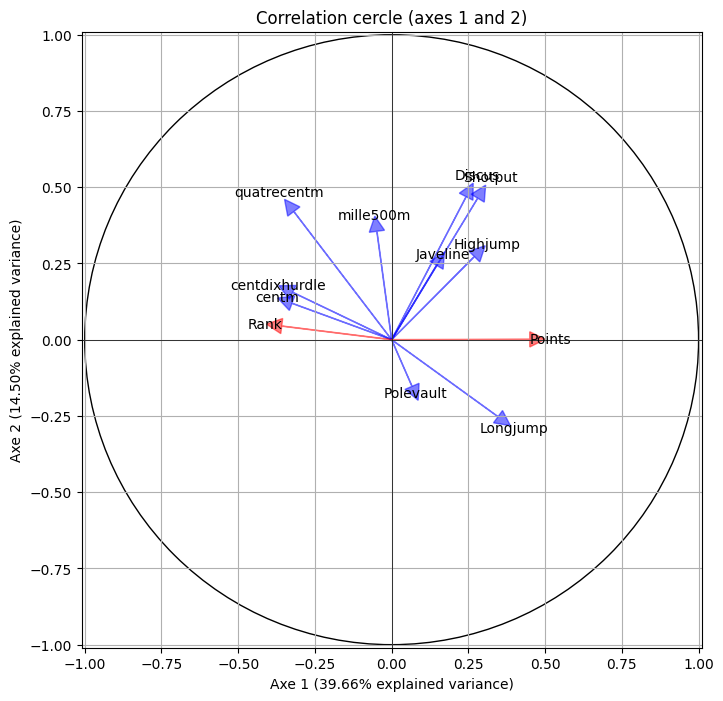

In [101]:
df_scaled2 = df.copy()

# Centering and reducting only on numeric data
variables_to_scale = df.select_dtypes(include=['float', 'int']).columns
df_scaled2[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])

# PCA
components = pca.fit_transform(df_scaled2.select_dtypes(include=['float', 'int']))

# Explained variance for each components
explained_variance = pca.explained_variance_ratio_

# Eigen vectors
components = pca.components_

plt.figure(figsize=(8, 8))

# Pie chart
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)

# Abscissa and ordinate limits
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)

# Drawing eigen vectors
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    if (df.columns[i] == 'Rank' or df.columns[i] == 'Points'):
        plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05, head_length=0.05)
    else:
        plt.arrow(0, 0, x, y, color='b', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x * 1.15, y * 1.15, df.columns[i], ha='center', va='center')

# Abscissa and ordinate labels
plt.xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}% explained variance)')
plt.ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}% explained variance)')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Correlation cercle (axes 1 and 2)")

# Plot display
plt.show()

Comparez les positions de Karpov, Clay, etc. aux Jeux Olympiques et au Décastar. 
Peut-on en conclure que le niveau des deux compétitions n'est pas le même ? 
Pour répondre à cette question, nous ajoutons la variable supplémentaire 
Variable 'Compétition'.  Cette variable est qualitative et est appelée facteur. Deux 
individus représentant un individu moyen pour chaque compétition 
sont ajoutés au graphique. Que pouvez-vous en conclure ?

**Explications** :
- Comme le premier axe est presque identique à la variable « Points », on peut conclure que les scores sont plus faibles pour le décastar. Est-ce parce que les athlètes participant aux Jeux Olympiques sont meilleurs ou parce qu'ils sont plus motivés ?  En revanche, les deux compétitions sont au même niveau sur l'axe 2, ce qui signifie que les individus ne changent pas de profil. 